In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import numpy as np
import json 
from sklearn.model_selection import train_test_split
import nltk
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

[nltk_data] Downloading package stopwords to /data/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /data/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data_path = "/data/ubuntu/constrastive_representation_learning/data/dataset_big_patent_v1.json"
with open(data_path) as f:
    data = json.load(f)

In [4]:
# dataset_length
len(data)

499

In [17]:
data[0].keys()

dict_keys(['query', 'negative', 'pos'])

In [21]:
# Longueur des textes
lengths_query = [len(patent["query"]) for patent in data]
lengths_pos= [len(patent["pos"]) for patent in data]
lengths_neg=[len(patent["negative"]) for patent in data]
#print(f"{lengths_query=} , {lengths_pos=} , {lengths_neg=}")
print("lengths_pos, max", max(lengths_pos), "mean ", np.mean(lengths_pos))
print("lengths_neg, max", max(lengths_neg), "mean ", np.mean(lengths_neg))
print("lengths_query, max", max(lengths_query), "mean ", np.mean(lengths_query))

lengths_pos, max 24641 mean  18507.400801603206
lengths_neg, max 12274 mean  1889.2685370741483
lengths_query, max 230 mean  128.43486973947896


In [9]:
# Longueur des textes nb de mots
lengths_query = [len(word_tokenize(patent["query"])) for patent in data]
lengths_pos= [len(word_tokenize(patent["pos"])) for patent in data]
lengths_neg=[len(word_tokenize(patent["negative"])) for patent in data]

#print(f"{lengths_query=} , {lengths_pos=} , {lengths_neg=}")
print("lengths_pos, max", max(lengths_pos), "mean ", np.mean(lengths_pos))
print("lengths_neg, max", max(lengths_neg), "mean ", np.mean(lengths_neg))
print("lengths_query, max", max(lengths_query), "mean ", np.mean(lengths_query))

lengths_pos, max 4389 mean  3424.7394789579157
lengths_neg, max 2046 mean  299.92184368737475
lengths_query, max 37 mean  20.370741482965933


In [12]:
# Longueur des textes après retrait des stop words :
stop=set(stopwords.words('english'))
lengths_pos=[]
for instance in data:

    word_tokens = word_tokenize(instance["pos"])
    word_tokens = [w.lower() for w in word_tokens if (w.isalpha() and w not in stop)]
    lengths_pos.append(len(word_tokens))

print("lengths_pos, max", max(lengths_pos), "mean ", np.mean(lengths_pos))    

lengths_pos, max 2013 mean  1656.7655310621242


<Axes: >

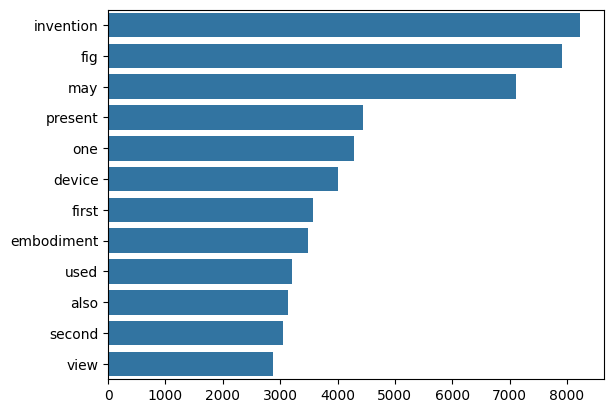

In [42]:
# Word distribution

stop=set(stopwords.words('english'))
corpus = ""

for instance in data:
    for text in instance.values():
        corpus+=text
        
word_tokens = word_tokenize(corpus)
word_tokens = [w.lower() for w in word_tokens if w.isalpha()]
counter=Counter(word_tokens)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

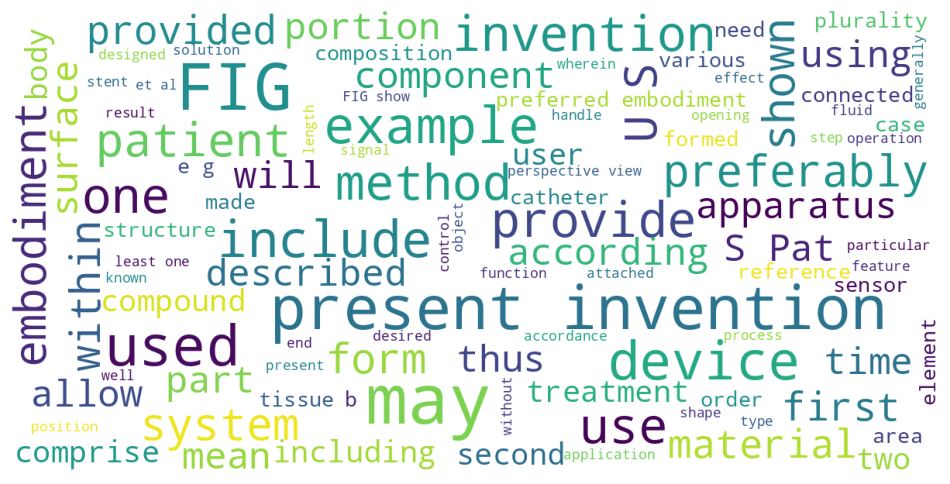

In [7]:


def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

corpus="" 
for instance in data:
    for text in instance.values():
        corpus+=text
show_wordcloud(corpus)